In [220]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers

warnings.filterwarnings("ignore")

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
data=pd.read_csv("Sales.csv")

In [ ]:
#ilk 5 satır
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
#Son 5 satır
data.tail()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260
113035,2016-03-04,4,March,2016,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",23,24,64,655,552,1207


In [ ]:
#satır ve sütun sayıları
data.shape

(113036, 18)

In [ ]:
#veri seti hakkında genel bilgi,veri tiplerinin alanlara göre çeşitli olduğu görünmektedir.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Columns: 230 entries, Day to Sub_Category_Vests
dtypes: bool(218), int64(12)
memory usage: 33.8 MB


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [ ]:
data.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [ ]:
data.index

RangeIndex(start=0, stop=113036, step=1)

In [ ]:
#sütunlar özelinde toplam kayıt sayıları,ortalama değerleri,standart sapma,min ve max değerler,çeyrek değerleri
data.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,113036,2014-11-23 12:14:55.063519232,2011-01-01 00:00:00,2013-12-22 00:00:00,2014-06-27 00:00:00,2016-01-09 00:00:00,2016-07-31 00:00:00,NaN
Day,113036.0,15.665753,1.0,8.0,16.0,23.0,31.0,8.781567
Year,113036.0,2014.401739,2011.0,2013.0,2014.0,2016.0,2016.0,1.27251
Customer_Age,113036.0,35.919212,17.0,28.0,35.0,43.0,87.0,11.021936
Order_Quantity,113036.0,11.90166,1.0,2.0,10.0,20.0,32.0,9.561857
Unit_Cost,113036.0,267.296366,1.0,2.0,9.0,42.0,2171.0,549.835483
Unit_Price,113036.0,452.938427,2.0,5.0,24.0,70.0,3578.0,922.071219
Profit,113036.0,285.051665,-30.0,29.0,101.0,358.0,15096.0,453.887443
Cost,113036.0,469.318695,1.0,28.0,108.0,432.0,42978.0,884.866118
Revenue,113036.0,754.37036,2.0,63.0,223.0,800.0,58074.0,1309.094674


In [ ]:
# Veriseti içerisinde boş değer var mı yok mu
data.isnull().values.any()

np.False_

In [ ]:
# Veriseti içerisinde boş değer var ise adedi
data.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [ ]:
for i in data.columns:
    print("Column Name : ",i)
    print("\n*************\n")
    print(data[i].unique())
    print("\n*************\n")


Column Name :  Date

*************

<DatetimeArray>
['2013-11-26 00:00:00', '2015-11-26 00:00:00', '2014-03-23 00:00:00',
 '2016-03-23 00:00:00', '2014-05-15 00:00:00', '2016-05-15 00:00:00',
 '2014-05-22 00:00:00', '2016-05-22 00:00:00', '2014-02-22 00:00:00',
 '2016-02-22 00:00:00',
 ...
 '2012-09-06 00:00:00', '2011-09-06 00:00:00', '2012-01-07 00:00:00',
 '2011-01-07 00:00:00', '2012-10-27 00:00:00', '2011-10-27 00:00:00',
 '2013-01-06 00:00:00', '2015-01-06 00:00:00', '2012-02-20 00:00:00',
 '2011-02-20 00:00:00']
Length: 1884, dtype: datetime64[ns]

*************

Column Name :  Day

*************

[26 23 15 22 30  2 17 27 25 13 19 11 31 28  7 24  3  4 10 12  6 20 29 16
 14 18  9  8  5  1 21]

*************

Column Name :  Month

*************

['November' 'March' 'May' 'February' 'July' 'August' 'September' 'January'
 'December' 'June' 'October' 'April']

*************

Column Name :  Year

*************

[2013 2015 2014 2016 2012 2011]

*************

Column Name :  Customer_Ag

In [ ]:
# her sütuna ait verilerin toplam değerleri
for i in data.columns:
    print("Column Name : ",i)
    print("\n*************\n")
    print(data[i].value_counts())
    print("\n*************\n")

Column Name :  Date

*************

Date
2014-03-01    288
2016-03-01    288
2013-12-07    241
2015-12-07    241
2014-06-14    236
             ... 
2012-02-21      1
2012-05-29      1
2011-05-29      1
2012-11-04      1
2011-11-04      1
Name: count, Length: 1884, dtype: int64

*************

Column Name :  Day

*************

Day
24    4078
7     4072
3     3998
19    3996
20    3986
8     3986
15    3968
28    3938
18    3830
12    3826
6     3818
14    3806
17    3788
1     3780
21    3682
26    3636
9     3630
13    3626
5     3582
27    3582
2     3554
4     3530
23    3512
11    3500
10    3486
22    3460
25    3460
30    3272
29    3260
16    3220
31    2174
Name: count, dtype: int64

*************

Column Name :  Month

*************

Month
June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: count,

In [ ]:
type(data["Country"].head())

pandas.core.series.Series

In [ ]:
data[["Country"]].head()

,Country
0,Canada
1,Canada
2,Australia
3,Australia
4,Australia


In [ ]:
data.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [ ]:
#ülkelerin toplam siparişleri
data.groupby("Country")["Order_Quantity"].sum().sort_values(ascending=False).head(10)

Country
United States     477539
Australia         263585
Canada            192259
United Kingdom    157218
France            128995
Germany           125720
Name: Order_Quantity, dtype: int64

In [ ]:
#yaş gruplarına göre sipariş sayıları
data.groupby("Age_Group")["Order_Quantity"].sum().sort_values(ascending=False).head(10)

Age_Group
Adults (35-64)          672417
Young Adults (25-34)    446875
Youth (<25)             216147
Seniors (64+)             9877
Name: Order_Quantity, dtype: int64

In [ ]:
#ürünlere ait toplam siparişler
data.groupby("Product")["Order_Quantity"].sum().sort_values(ascending=False).head(10)

Product
Water Bottle - 30 oz.      164086
Patch Kit/8 Patches        157583
Mountain Tire Tube         102792
AWC Logo Cap                67316
Sport-100 Helmet, Red       63663
Road Tire Tube              62296
Fender Set - Mountain       62118
Sport-100 Helmet, Black     62105
Touring Tire Tube           56802
Sport-100 Helmet, Blue      55895
Name: Order_Quantity, dtype: int64

In [ ]:
#ürünlere ait elde edilen kar
data.groupby("Product")["Profit"].sum().sort_values(ascending=False).head(10)

Product
Mountain-200 Black, 38     1310464
Road-150 Red, 62           1243755
Mountain-200 Silver, 42    1231452
Sport-100 Helmet, Red      1191402
Mountain-200 Silver, 38    1165560
Sport-100 Helmet, Black    1141330
Mountain-200 Black, 46     1080672
Road-150 Red, 52           1053260
Sport-100 Helmet, Blue     1048446
Mountain-200 Black, 42     1036542
Name: Profit, dtype: int64

In [ ]:
#ürün kategori bazlı elde edilen karlar
data.groupby("Product_Category")["Profit"].sum().sort_values(ascending=False).head(10)

Product_Category
Bikes          20519276
Accessories     8862377
Clothing        2839447
Name: Profit, dtype: int64

In [ ]:
#ürün kategori bazlı maliyetler
data.groupby("Product_Category")["Cost"].sum().sort_values(ascending=False).head(10)

Product_Category
Bikes          41262858
Accessories     6255615
Clothing        5531435
Name: Cost, dtype: int64

In [ ]:
data.groupby("State")["Profit"].sum().sort_values(ascending=False).head(10)

State
California             7772869
England                4413853
British Columbia       3693348
New South Wales        3133684
Washington             1997550
Queensland             1619158
Victoria               1428026
Oregon                 1258168
Hessen                  813402
Nordrhein-Westfalen     647757
Name: Profit, dtype: int64

In [ ]:
#eyaletlere göre verilen siparişler
data.groupby("State")["Order_Quantity"].sum().sort_values(ascending=False).head(10)

State
California             269759
British Columbia       191556
England                157218
Washington             137947
New South Wales        115932
Oregon                  67012
Victoria                66231
Queensland              57592
Saarland                31084
Nordrhein-Westfalen     29923
Name: Order_Quantity, dtype: int64

In [ ]:
#yıllara göre verilen sipariş sayıları toplamı
data.groupby("Year")["Order_Quantity"].sum().sort_values(ascending=False).head(10)

Year
2014    379585
2016    370813
2013    294787
2015    289517
2012      5354
2011      5260
Name: Order_Quantity, dtype: int64

In [ ]:
#yıllara göre elde edilen toplam kar
data.groupby("Year")["Profit"].sum().sort_values(ascending=False).head(10)

Year
2015    7528563
2016    7035948
2013    5959208
2014    5864087
2012    2951993
2011    2881301
Name: Profit, dtype: int64

In [ ]:
data.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [ ]:
data.groupby("Month")["Order_Quantity"].sum().sort_values(ascending=False).head(10)

Month
December     133312
June         128591
May          125715
April        118467
March        111085
January      110367
November     108637
October      108348
February     104717
September    103171
Name: Order_Quantity, dtype: int64

In [ ]:
#aylara göre toplam siparişler
data.groupby("Month")["Order_Quantity"].sum().sort_values(ascending=False).head(10)

Month
December     133312
June         128591
May          125715
April        118467
March        111085
January      110367
November     108637
October      108348
February     104717
September    103171
Name: Order_Quantity, dtype: int64

In [ ]:
#aylara göre elde edilen toplam gelir.
data.groupby("Month")["Revenue"].sum().sort_values(ascending=False).head(10)

Month
December     9086931
June         9043008
May          8836763
April        7602750
March        7347164
January      7005895
February     6834583
November     6244298
October      5995079
September    5841885
Name: Revenue, dtype: int64

In [ ]:
#yıllara göre elde edilen toplam gelir.
data.groupby("Year")["Revenue"].sum().sort_values(ascending=False).head(10)

Year
2015    20023991
2016    17713385
2013    15240037
2014    14152724
2012     9175983
2011     8964888
Name: Revenue, dtype: int64

In [ ]:
#cinsiyetlere göre yaş ortalaması ve sipariş sayıları
data.groupby("Customer_Gender").agg({"Customer_Age": ["mean"],"Order_Quantity": "mean"})

,Customer_Age,Order_Quantity
,mean,mean
Customer_Gender,,
F,36.168993,11.799814
M,35.684799,11.997239


In [ ]:
data.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [ ]:
#ülkelere göre yaş oralaması ve sipariş ortalamaları
data.groupby("Country").agg({"Customer_Age": ["mean"],"Order_Quantity": "mean"})

,Customer_Age,Order_Quantity
,mean,mean
Country,,
Australia,34.383941,11.012074
Canada,36.238962,13.560375
France,35.116930,11.728951
Germany,34.868084,11.328167
United Kingdom,35.551836,11.543172
United States,37.391114,12.180253


In [ ]:
#ülkelere göre maliyetler,karlar,gelirler
data.groupby("Country").agg({"Revenue": "mean","Profit": "mean","Cost": "mean"})

,Revenue,Profit,Cost
Country,,,
Australia,889.959016,283.089489,606.869527
Canada,559.721964,262.187615,297.534349
France,766.764139,261.891435,504.872704
Germany,809.028293,302.756803,506.271490
United Kingdom,781.659031,324.071439,457.587592
United States,713.552696,282.447687,431.105009


In [ ]:
#ürünlere göre maliyetler,karlar,gelirler
data.groupby("Product").agg({"Revenue": "mean","Profit": "mean","Cost": "mean"})

,Revenue,Profit,Cost
Product,,,
AWC Logo Cap,126.025700,17.899954,108.125746
All-Purpose Bike Stand,758.106195,444.831858,313.274336
Bike Wash - Dissolver,110.169069,64.305987,45.863082
"Classic Vest, L",845.732704,494.713836,351.018868
"Classic Vest, M",871.137500,505.437500,365.700000
...,...,...,...
"Touring-3000 Yellow, 62",786.583333,255.152778,531.430556
Water Bottle - 30 oz.,69.113860,38.710673,30.403187
"Women's Mountain Shorts, L",938.331395,554.377907,383.953488


In [ ]:
#ürün kategori bazlı göre maliyetler,karlar,gelirler
data.groupby("Product_Category").agg({"Revenue": "mean","Profit": "mean","Cost": "mean"})

,Revenue,Profit,Cost
Product_Category,,,
Accessories,215.601711,126.388719,89.212992
Bikes,2377.882149,789.749673,1588.132476
Clothing,494.323964,167.677276,326.646687


In [ ]:
#aylara göre ürünlere ait oplam karlar
pd.pivot_table(data, values='Profit', index='Product', columns='Month', aggfunc='sum')

Month,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
AWC Logo Cap,7107.0,6409.0,7824.0,6051.0,6494.0,4951.0,8600.0,6361.0,7173.0,5769.0,6036.0,5233.0
All-Purpose Bike Stand,22701.0,18988.0,23585.0,11454.0,12002.0,8981.0,11309.0,10681.0,18851.0,22969.0,23094.0,16449.0
Bike Wash - Dissolver,9317.0,8473.0,11231.0,10010.0,9429.0,8228.0,13147.0,7741.0,11567.0,8737.0,10213.0,7915.0
"Classic Vest, L",11477.0,10576.0,10525.0,11336.0,18433.0,19498.0,12284.0,16915.0,8621.0,17560.0,13134.0,6960.0
"Classic Vest, M",17994.0,15837.0,14570.0,11769.0,14004.0,7330.0,12216.0,10430.0,9042.0,17147.0,14760.0,16641.0
...,...,...,...,...,...,...,...,...,...,...,...,...
"Touring-3000 Yellow, 62",2875.0,2409.0,2750.0,902.0,2083.0,1980.0,370.0,902.0,1876.0,250.0,1420.0,554.0
Water Bottle - 30 oz.,40066.0,30199.0,42200.0,33422.0,32057.0,23379.0,42188.0,39659.0,41888.0,29727.0,30898.0,32160.0
"Women's Mountain Shorts, L",30278.0,23477.0,37501.0,25618.0,21633.0,17531.0,21522.0,12897.0,27060.0,26276.0,15947.0,26319.0


In [ ]:
#ürünlerin ay olarak toplam karları
pd.pivot_table(data, values='Profit', index='Product', columns='Month', aggfunc='sum')

Month,April,August,December,February,January,July,June,March,May,November,October,September
Product,,,,,,,,,,,,
AWC Logo Cap,7107.0,6409.0,7824.0,6051.0,6494.0,4951.0,8600.0,6361.0,7173.0,5769.0,6036.0,5233.0
All-Purpose Bike Stand,22701.0,18988.0,23585.0,11454.0,12002.0,8981.0,11309.0,10681.0,18851.0,22969.0,23094.0,16449.0
Bike Wash - Dissolver,9317.0,8473.0,11231.0,10010.0,9429.0,8228.0,13147.0,7741.0,11567.0,8737.0,10213.0,7915.0
"Classic Vest, L",11477.0,10576.0,10525.0,11336.0,18433.0,19498.0,12284.0,16915.0,8621.0,17560.0,13134.0,6960.0
"Classic Vest, M",17994.0,15837.0,14570.0,11769.0,14004.0,7330.0,12216.0,10430.0,9042.0,17147.0,14760.0,16641.0
...,...,...,...,...,...,...,...,...,...,...,...,...
"Touring-3000 Yellow, 62",2875.0,2409.0,2750.0,902.0,2083.0,1980.0,370.0,902.0,1876.0,250.0,1420.0,554.0
Water Bottle - 30 oz.,40066.0,30199.0,42200.0,33422.0,32057.0,23379.0,42188.0,39659.0,41888.0,29727.0,30898.0,32160.0
"Women's Mountain Shorts, L",30278.0,23477.0,37501.0,25618.0,21633.0,17531.0,21522.0,12897.0,27060.0,26276.0,15947.0,26319.0


In [ ]:
#ürümleri ülkelere göre kar toplamları
pd.pivot_table(data, values='Profit', index='Product', columns='Country', aggfunc='sum')

Country,Australia,Canada,France,Germany,United Kingdom,United States
Product,,,,,,
AWC Logo Cap,7563.0,14188.0,5280.0,9102.0,16825.0,25050.0
All-Purpose Bike Stand,52881.0,22137.0,15969.0,16504.0,25941.0,67632.0
Bike Wash - Dissolver,25461.0,19172.0,6123.0,7936.0,11596.0,45720.0
"Classic Vest, L",25762.0,35540.0,19688.0,17970.0,13405.0,44954.0
"Classic Vest, M",31835.0,23418.0,14096.0,16055.0,21790.0,54546.0
...,...,...,...,...,...,...
"Touring-3000 Yellow, 62",2720.0,1095.0,1547.0,6271.0,NaN,6738.0
Water Bottle - 30 oz.,72924.0,67836.0,34104.0,31240.0,55298.0,156441.0
"Women's Mountain Shorts, L",36342.0,64171.0,16617.0,3798.0,14954.0,150177.0


In [ ]:
yearly_sales = data.groupby('Year').agg({
    'Order_Quantity': 'sum',
    'Revenue': 'sum',
    'Profit':'sum'
}).reset_index()

<Axes: >

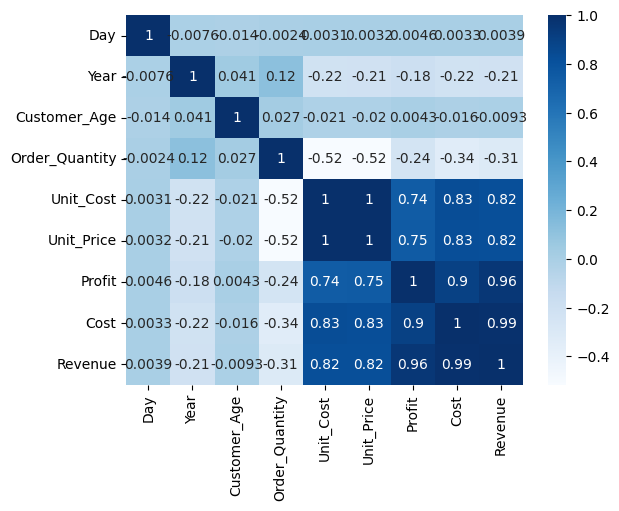

In [ ]:
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='Blues')

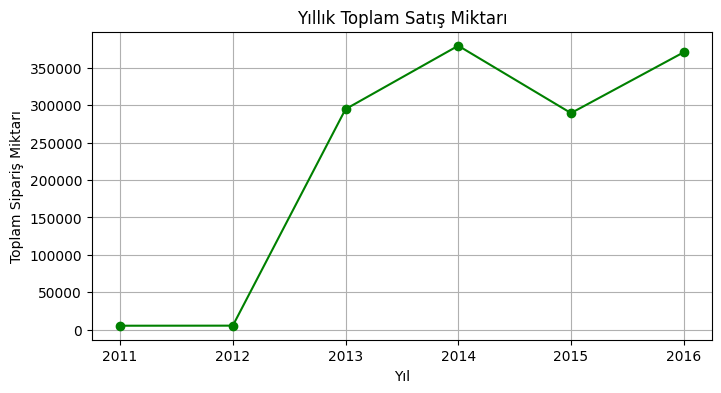

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(yearly_sales['Year'], yearly_sales['Order_Quantity'], marker='o', linestyle='-',color='green')
plt.title('Yıllık Toplam Satış Miktarı')
plt.xlabel('Yıl')
plt.ylabel('Toplam Sipariş Miktarı')
plt.grid(True)
plt.show()

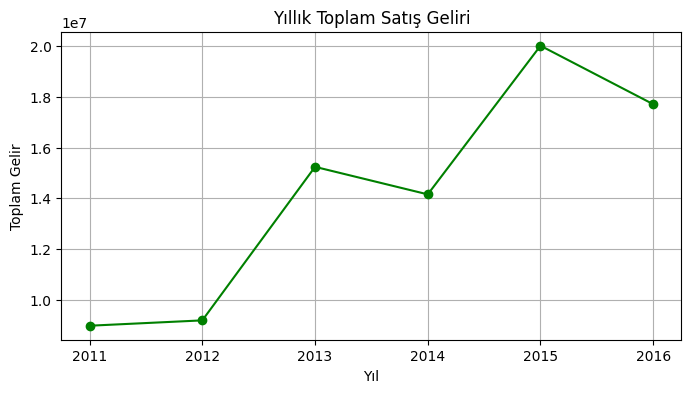

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(yearly_sales['Year'], yearly_sales['Revenue'], marker='o', linestyle='-', color='green')
plt.title('Yıllık Toplam Satış Geliri')
plt.xlabel('Yıl')
plt.ylabel('Toplam Gelir')
plt.grid(True)
plt.show()

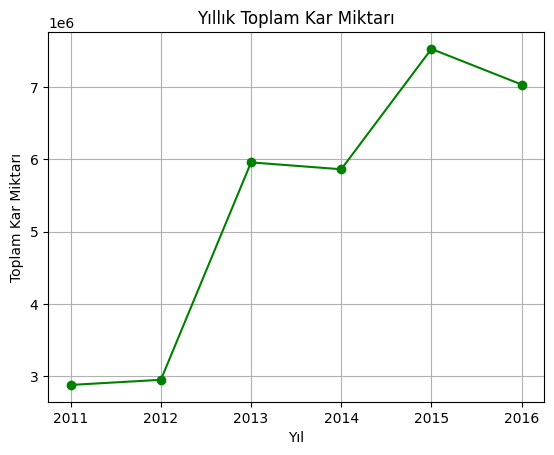

In [ ]:
plt.plot(yearly_sales['Year'], yearly_sales['Profit'], marker='o', linestyle='-', color='green')
plt.title('Yıllık Toplam Kar Miktarı')
plt.xlabel('Yıl')
plt.ylabel('Toplam Kar Miktarı')
plt.grid(True)
plt.show()

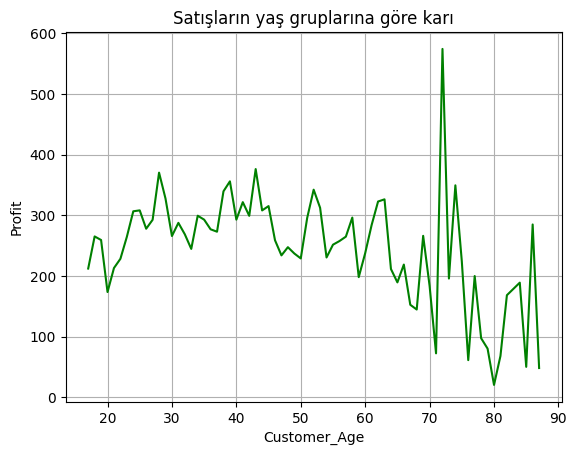

In [ ]:
#müşteri yaşlarına göre elde edilen kar
sns.lineplot(data=data, x="Customer_Age", y="Profit",ci=None,color="green")
plt.title('Satışların yaş gruplarına göre karı')
plt.grid(True)

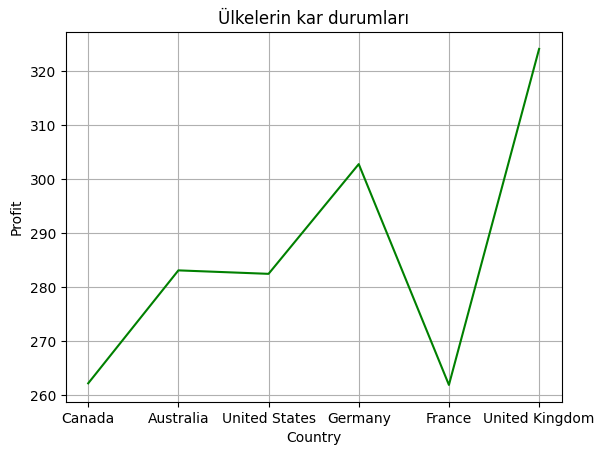

In [ ]:
#Ülkelere göre elde edilen karlar
sns.lineplot(data=data, x="Country", y="Profit",ci=None,color="green")
plt.title('Ülkelerin kar durumları')
plt.grid(True)

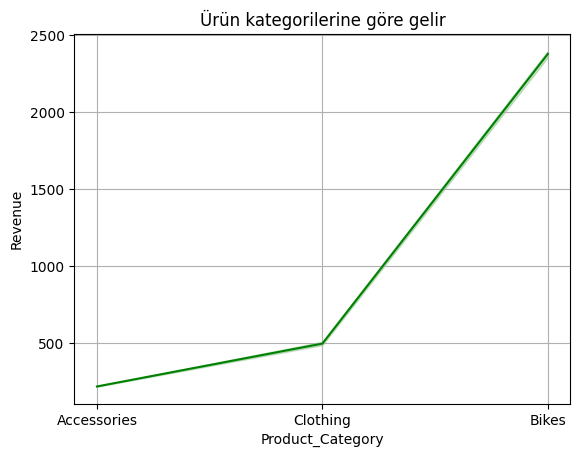

In [ ]:
#ürün kategorilerinden elde edilen gelirler
sns.lineplot(data=data, x="Product_Category", y="Revenue",color="green")
plt.title('Ürün kategorilerine göre gelir')
plt.grid(True)

Text(0.5, 1.0, 'Yaş Dağılımı')

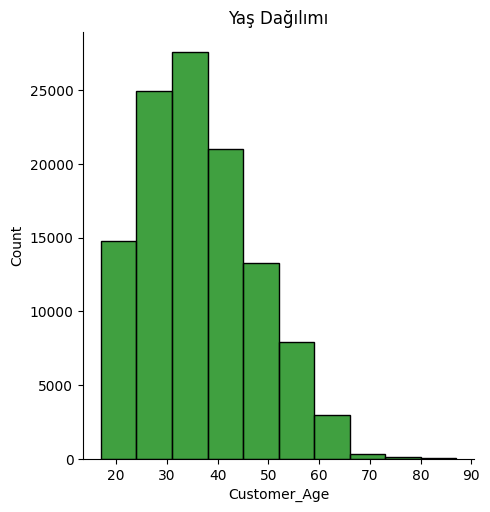

In [ ]:
sns.displot(data=data, x="Customer_Age",bins=10,color="green")
plt.title('Yaş Dağılımı')

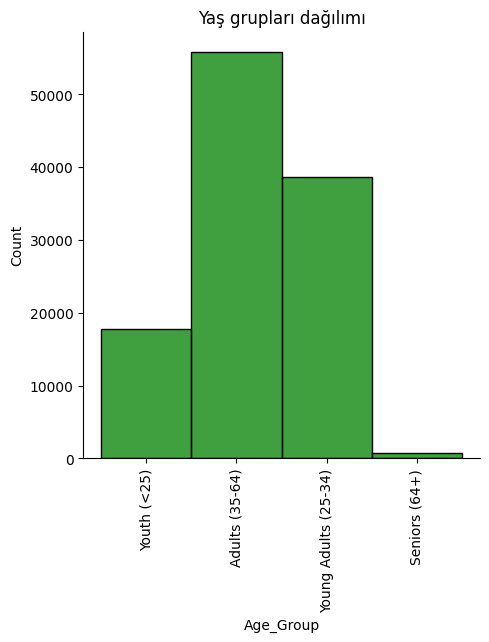

In [ ]:
#Yaş grupları dağılımı
sns.displot(data=data, x="Age_Group",bins=30,color="green")
plt.title('Yaş grupları dağılımı')
plt.xticks(rotation=90)
plt.show()

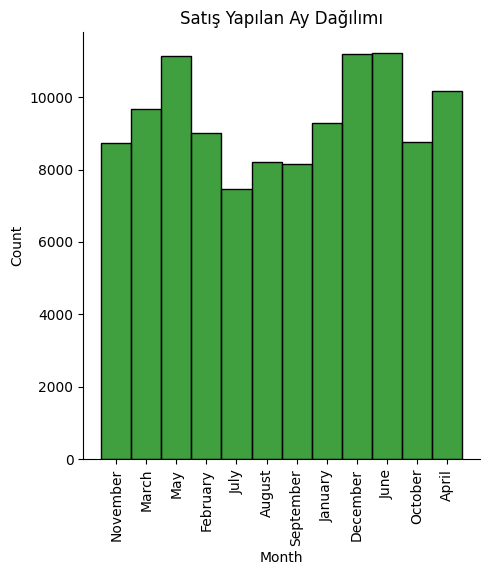

In [ ]:
#ay dağılımı
sns.displot(data=data, x="Month",bins=40,color="green")
plt.title("Satış Yapılan Ay Dağılımı")
plt.xticks(rotation=90)
plt.show()

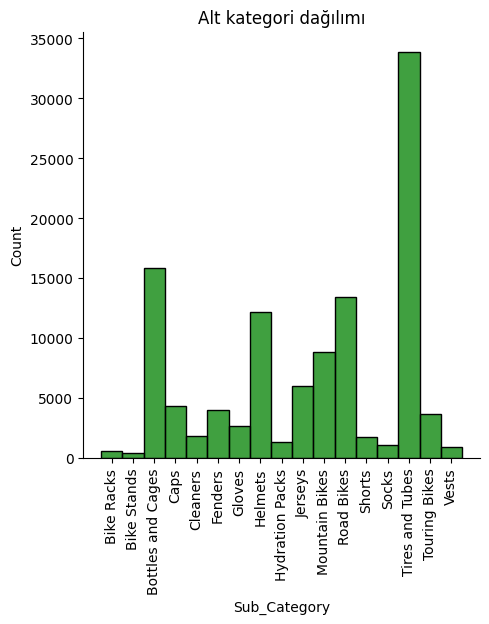

In [ ]:
sns.displot(data=data, x="Sub_Category",bins=40,color="green")
plt.title("Alt kategori dağılımı")
plt.xticks(rotation=90)
plt.show()

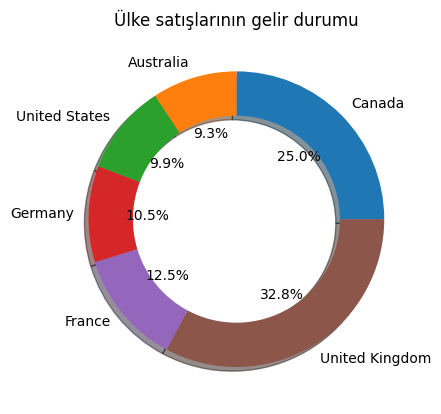

In [ ]:
labels=data["Country"].unique()
views=data.groupby("Country")["Revenue"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Ülke satışlarının gelir durumu')
plt.show()

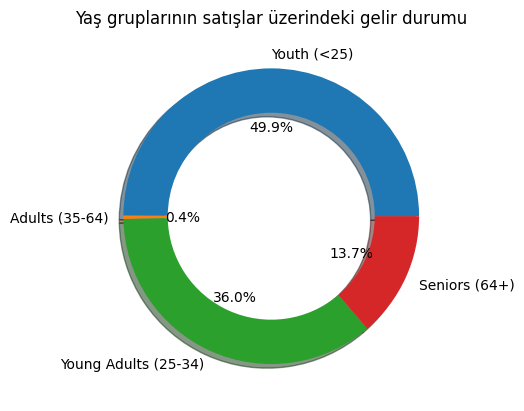

In [ ]:
labels=data["Age_Group"].unique()
views=data.groupby("Age_Group")["Revenue"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Yaş gruplarının satışlar üzerindeki gelir durumu')
plt.show()

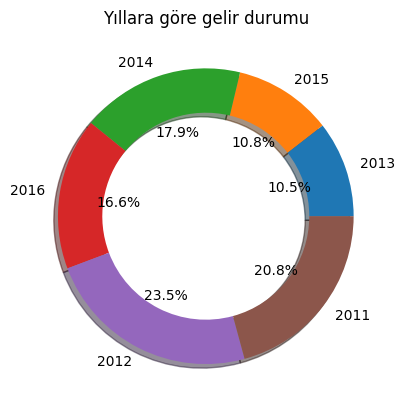

In [ ]:
labels=data["Year"].unique()
views=data.groupby("Year")["Revenue"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Yıllara göre gelir durumu')
plt.show()

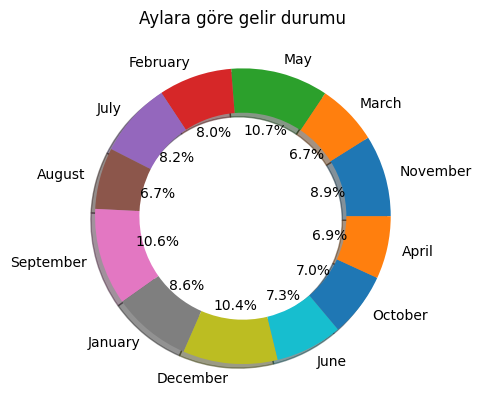

In [ ]:
labels=data["Month"].unique()
views=data.groupby("Month")["Revenue"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Aylara göre gelir durumu')
plt.show()

In [ ]:
data.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

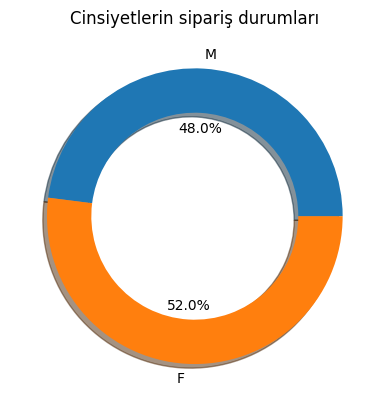

In [ ]:
labels=data["Customer_Gender"].unique()
views=data.groupby("Customer_Gender")["Order_Quantity"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Cinsiyetlerin sipariş durumları')
plt.show()

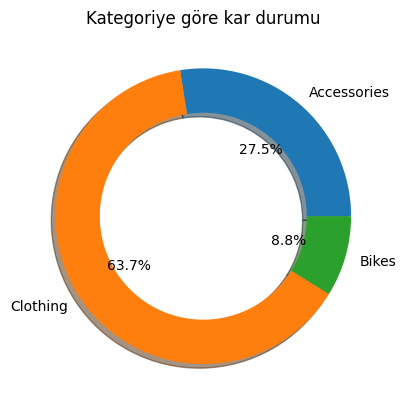

In [ ]:
labels=data["Product_Category"].unique()
views=data.groupby("Product_Category")["Profit"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Kategoriye göre kar durumu')
plt.show()

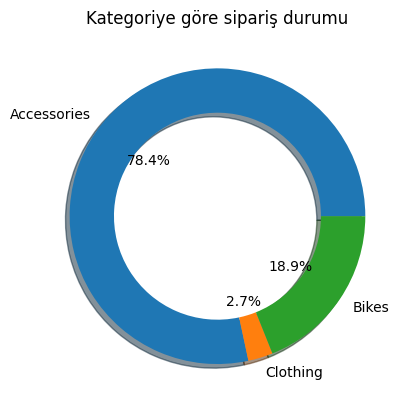

In [ ]:
labels=data["Product_Category"].unique()
views=data.groupby("Product_Category")["Order_Quantity"].sum()
plt.pie(views,labels=labels,autopct="%1.1f%%",shadow=True,wedgeprops={"width":0.3})
plt.title('Kategoriye göre sipariş durumu')
plt.show()

In [ ]:
print(data["Month"].unique())
print(data["Age_Group"].unique())
print(data["Customer_Gender"].unique())
print(data["Country"].unique())
print(data["State"].unique())
print(data["Product_Category"].unique())
print(data["Sub_Category"].unique())


['November' 'March' 'May' 'February' 'July' 'August' 'September' 'January'
 'December' 'June' 'October' 'April']
['Youth (<25)' 'Adults (35-64)' 'Young Adults (25-34)' 'Seniors (64+)']
['M' 'F']
['Canada' 'Australia' 'United States' 'Germany' 'France' 'United Kingdom']
['British Columbia' 'New South Wales' 'Victoria' 'Oregon' 'California'
 'Saarland' 'Seine Saint Denis' 'Moselle' 'Queensland' 'England' 'Nord'
 'Washington' 'Hessen' 'Nordrhein-Westfalen' 'Hamburg' 'Loir et Cher'
 'Kentucky' 'Seine (Paris)' 'South Australia' 'Loiret' 'Alberta' 'Bayern'
 'Hauts de Seine' 'Yveline' 'Essonne' "Val d'Oise" 'Tasmania'
 'Seine et Marne' 'Val de Marne' 'Pas de Calais' 'Charente-Maritime'
 'Garonne (Haute)' 'Brandenburg' 'Texas' 'New York' 'Florida' 'Somme'
 'Illinois' 'South Carolina' 'North Carolina' 'Georgia' 'Virginia' 'Ohio'
 'Ontario' 'Wyoming' 'Missouri' 'Montana' 'Utah' 'Minnesota' 'Mississippi'
 'Massachusetts' 'Arizona' 'Alabama']
['Accessories' 'Clothing' 'Bikes']
['Bike Racks' 'Bike 

In [ ]:
# Assuming 'data' is your DataFrame
label_encoder = LabelEncoder()
encode = ["Month", "Age_Group", "Customer_Gender", "Country", "State", "Product_Category","Product","Sub_Category"]

# Loop through each column in the 'encode' list
for column in encode:
    # Check if the column has 4 or fewer unique values
    if data[column].nunique() <= 4:
        # Apply label encoding if there are 4 or fewer unique values
        data[column] = label_encoder.fit_transform(data[column])
        print(f"Applied label encoding to: {column}")
    else:
        # Apply one-hot encoding if there are more than 4 unique values
        data = pd.get_dummies(data, columns=[column])
        print(f"Applied one-hot encoding to: {column}")

# Display the first few rows to verify the changes
print(data.head())

Applied one-hot encoding to: Month
Applied label encoding to: Age_Group
Applied label encoding to: Customer_Gender
Applied one-hot encoding to: Country
Applied one-hot encoding to: State
Applied label encoding to: Product_Category
Applied one-hot encoding to: Product
Applied one-hot encoding to: Sub_Category
        Date  Day  Year  Customer_Age  Age_Group  Customer_Gender  \
0 2013-11-26   26  2013            19          3                1   
1 2015-11-26   26  2015            19          3                1   
2 2014-03-23   23  2014            49          0                1   
3 2016-03-23   23  2016            49          0                1   
4 2014-05-15   15  2014            47          0                0   

   Product_Category  Order_Quantity  Unit_Cost  Unit_Price  ...  \
0                 0               8         45         120  ...   
1                 0               8         45         120  ...   
2                 0              23         45         120  ...   
3      

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Columns: 231 entries, Date to Sub_Category_Vests
dtypes: bool(218), datetime64[ns](1), int64(12)
memory usage: 34.7 MB


In [ ]:
remove = "Date"
data = data.drop(columns=remove)
print(data.head())

   Day  Year  Customer_Age  Age_Group  Customer_Gender  Product_Category  \
0   26  2013            19          3                1                 0   
1   26  2015            19          3                1                 0   
2   23  2014            49          0                1                 0   
3   23  2016            49          0                1                 0   
4   15  2014            47          0                0                 0   

   Order_Quantity  Unit_Cost  Unit_Price  Profit  ...  Sub_Category_Helmets  \
0               8         45         120     590  ...                 False   
1               8         45         120     590  ...                 False   
2              23         45         120    1366  ...                 False   
3              20         45         120    1188  ...                 False   
4               4         45         120     238  ...                 False   

   Sub_Category_Hydration Packs  Sub_Category_Jerseys  \
0          

In [ ]:
data

,Day,Year,Customer_Age,Age_Group,Customer_Gender,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,...,Sub_Category_Helmets,Sub_Category_Hydration Packs,Sub_Category_Jerseys,Sub_Category_Mountain Bikes,Sub_Category_Road Bikes,Sub_Category_Shorts,Sub_Category_Socks,Sub_Category_Tires and Tubes,Sub_Category_Touring Bikes,Sub_Category_Vests
0,26,2013,19,3,1,0,8,45,120,590,...,False,False,False,False,False,False,False,False,False,False
1,26,2015,19,3,1,0,8,45,120,590,...,False,False,False,False,False,False,False,False,False,False
2,23,2014,49,0,1,0,23,45,120,1366,...,False,False,False,False,False,False,False,False,False,False
3,23,2016,49,0,1,0,20,45,120,1188,...,False,False,False,False,False,False,False,False,False,False
4,15,2014,47,0,0,0,4,45,120,238,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,12,2016,41,0,1,2,3,24,64,112,...,False,False,False,False,False,False,False,False,False,True
113032,2,2014,18,3,1,2,22,24,64,655,...,False,False,False,False,False,False,False,False,False,True
113033,2,2016,18,3,1,2,22,24,64,655,...,False,False,False,False,False,False,False,False,False,True
113034,4,2014,37,0,0,2,24,24,64,684,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
y = data['Revenue']
X = data.drop(columns=['Revenue'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [223]:

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
])

model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=1)

NameError: name 'keras' is not defined

In [224]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

NameError: name 'model' is not defined

In [225]:
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Model Kaybı')
plt.ylabel('Kaybı')
plt.xlabel('Epoch')
plt.legend()
plt.show()

NameError: name 'history' is not defined